In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
DC = np.load('../Bases/Criados/Treino_Teste/treino_teste.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = DC['X_treino'], DC['X_teste'], DC['y_treino'], DC['y_teste'], list(DC['feature_names'])

In [3]:
len(X_treino)

14345

In [4]:
DC_over = np.load('../Bases/Criados/Treino_Teste/over.npz', allow_pickle=True)
X_treino_over, X_teste_over, y_treino_over, y_teste_over, feature_names= DC_over['X_treino'], DC_over['X_teste'], DC_over['y_treino'], DC_over['y_teste'], list(DC_over['feature_names'])

In [5]:
len(X_treino_over)

27102

In [6]:
DC_under = np.load('../Bases/Criados/Treino_Teste/under.npz', allow_pickle=True)
X_treino_under, X_teste_under, y_treino_under, y_teste_under, feature_names = DC_under['X_treino'], DC_under['X_teste'], DC_under['y_treino'], DC_under['y_teste'], list(DC_under['feature_names'])

In [7]:
len(X_treino_under)

14092

In [8]:
DC_random_under = np.load('../Bases/Criados/Treino_Teste/random.npz', allow_pickle=True)
X_treino_rd_under, X_teste_rd_under, y_treino_rd_under, y_teste_rd_under, feature_names = DC_random_under['X_treino'], DC_random_under['X_teste'], DC_random_under['y_treino'], DC_random_under['y_teste'], list(DC_random_under['feature_names'])

In [9]:
len(X_treino_rd_under)

1588

In [10]:
DC_DSTO = np.load('../Bases/Criados/Treino_Teste/dsto.npz', allow_pickle=True)
X_treino_DSTO, X_teste_DSTO, y_treino_DSTO, y_teste_DSTO, feature_names = DC_DSTO['X_treino'], DC_DSTO['X_teste'], DC_DSTO['y_treino'], DC_DSTO['y_teste'], list(DC_DSTO['feature_names'])

In [11]:
len(X_treino_DSTO)

27102

## Parametros e funcoes

In [12]:
param_bayes = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'n_estimators': Integer(50, 120),
    'max_features': Integer(2, 5)
}

# Modelos

### Modelo Padrao

In [13]:
bayes_search = BayesSearchCV(RandomForestClassifier(), param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 37, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 79})
Melhor pontuação de validação cruzada: 0.94


In [14]:
best_model_bayes = bayes_search.best_estimator_

### Resultados

In [15]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 0.94


In [16]:
print(classification_report(y_teste, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       359
         2.0       0.94      1.00      0.97      5789

    accuracy                           0.94      6148
   macro avg       0.47      0.50      0.48      6148
weighted avg       0.89      0.94      0.91      6148



c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

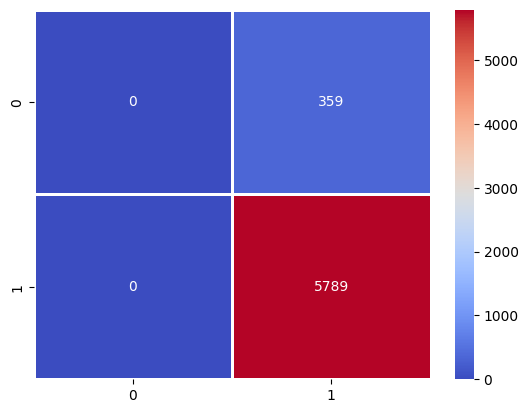

In [17]:
cfm_matrix = confusion_matrix(y_teste,previsoes_bayes)
sns.heatmap(cfm_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.show()

Variáveis mais relevantes:
P00104: 0.1102205059617722
P00404: 0.09664215269792886
V0001: 0.07163694313941411
Q00201: 0.06325349828321297
P01101: 0.05496775366312304
P018: 0.047442429244473
N016: 0.042126973025265656
P04502: 0.03919956965999761
N00101: 0.039065295426586794
Renda: 0.03878908791935841
P02501: 0.03733179791880398
Escolaridade: 0.03485415556497941
Atividade_fisica_semanal: 0.02708489971987788
Tempo_parou_fumar: 0.02670867475196713
C009: 0.025414445947023637
Inicio_tabagismo: 0.024775582473309132
Q03001: 0.023686844541984407
P02001: 0.023095261116127745
Consumo_alcool: 0.021264099283224962
B001: 0.020906618009487166
Carga_horaria_semanal: 0.01971747588885933
P068: 0.01547516317806614
Quant_trabalhos: 0.014260941455487963
Q11006: 0.013193810525956525
Instituicao_plano: 0.012961325943284672
V0026: 0.010929277268938942
Cobertura_plano: 0.0105501831809926
Q128: 0.01035888941813593
P02602: 0.009451837768169555
T001: 0.007346283790296381
Intensidade_fumo: 0.007288223233893898


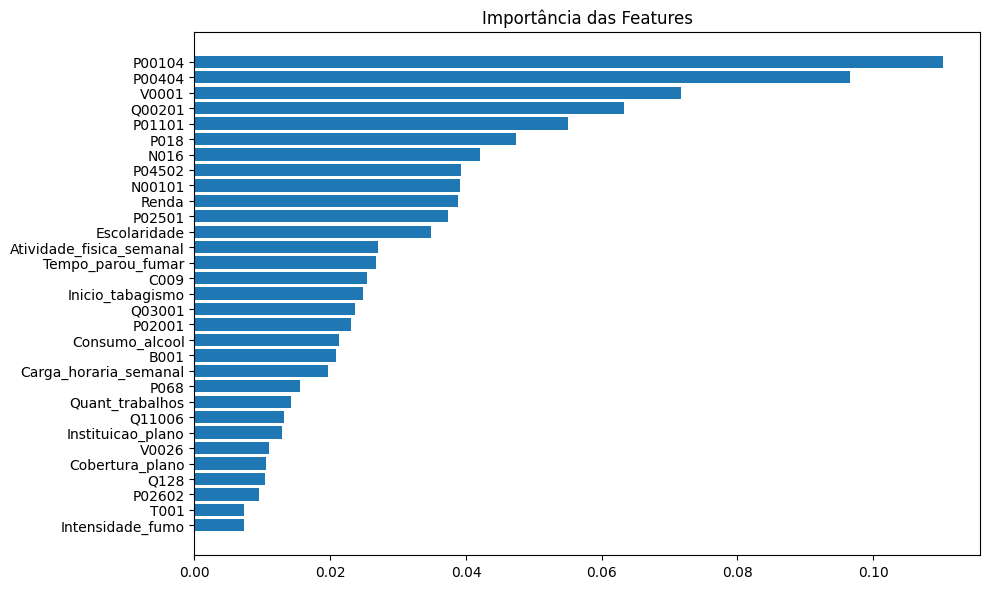

In [18]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### OverSampling

In [19]:
bayes_search.fit(X_treino_over, y_treino_over)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'entropy', 'max_depth': 42, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120})
Melhor pontuação de validação cruzada: 0.97


In [20]:
best_model_bayes = bayes_search.best_estimator_

In [21]:
previsoes_bayes = best_model_bayes.predict(X_teste_over)

In [22]:
print(classification_report(y_teste_over, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.20      0.01      0.03       359
         2.0       0.94      1.00      0.97      5789

    accuracy                           0.94      6148
   macro avg       0.57      0.51      0.50      6148
weighted avg       0.90      0.94      0.91      6148



Variáveis mais relevantes:
Q00201: 0.11649265135042162
N00101: 0.08118128127698712
N016: 0.056547380029311346
Q03001: 0.05006771838754838
P00104: 0.045506244220537166
P01101: 0.04543668469686432
P00404: 0.04332514654971212
P04502: 0.037775288029932526
P018: 0.03710305843319205
B001: 0.033983471505263686
V0001: 0.032029686322179535
Quant_trabalhos: 0.03104317601717883
Q128: 0.02953925758331652
P02501: 0.029533929848175825
C009: 0.02856010191456091
V0026: 0.027909187897453492
Carga_horaria_semanal: 0.025937941286587992
Q11006: 0.0235899146728462
Escolaridade: 0.02269700897986698
Atividade_fisica_semanal: 0.02112327359683368
Renda: 0.020487206551891044
Tempo_parou_fumar: 0.020474766913008625
P02001: 0.019697740587487526
Instituicao_plano: 0.019226511454037604
Cobertura_plano: 0.018989743781260046
P068: 0.01864373711184031
Consumo_alcool: 0.015005022583721201
Inicio_tabagismo: 0.014524390013044848
Intensidade_fumo: 0.012967133387739749
T001: 0.010658872831485797
P02602: 0.00994247218571278

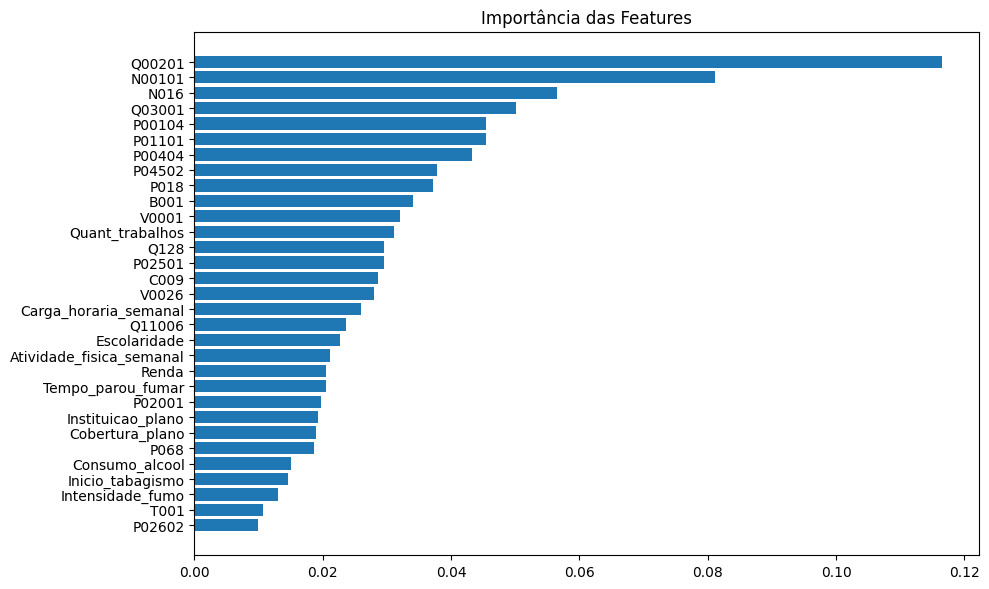

In [23]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### UnderSampling

In [24]:
bayes_search.fit(X_treino_under, y_treino_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 37, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 79})
Melhor pontuação de validação cruzada: 0.94


In [25]:
best_model_bayes = bayes_search.best_estimator_

In [26]:
previsoes_bayes = best_model_bayes.predict(X_teste_under)

In [27]:
print(classification_report(y_teste_under, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       359
         2.0       0.94      1.00      0.97      5789

    accuracy                           0.94      6148
   macro avg       0.47      0.50      0.48      6148
weighted avg       0.89      0.94      0.91      6148



c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Variáveis mais relevantes:
P00104: 0.10915827639294289
P00404: 0.09688673569382886
V0001: 0.06916612872780906
Q00201: 0.06265848292996741
P01101: 0.05661290446434493
P018: 0.04529962011827715
Renda: 0.042711716695162605
N016: 0.041102682854868414
N00101: 0.04102275384149927
P04502: 0.03852126719195848
Escolaridade: 0.038391854386820246
P02501: 0.0347893338210746
C009: 0.02666642766563937
P02001: 0.025901564648280622
Tempo_parou_fumar: 0.025655959415943827
Atividade_fisica_semanal: 0.02486941177028719
Inicio_tabagismo: 0.023966053379523924
Q03001: 0.023471343432747458
Consumo_alcool: 0.020832705320505247
Carga_horaria_semanal: 0.018545365542739903
B001: 0.018318159941141887
Quant_trabalhos: 0.016213200823828895
Q11006: 0.015144352246974978
P068: 0.014131638084550677
Instituicao_plano: 0.01238265320411128
V0026: 0.01070469418197147
Q128: 0.010509913866733722
P02602: 0.009781593778584816
Cobertura_plano: 0.009672451422684605
T001: 0.008519917446245107
Intensidade_fumo: 0.00839083670895115

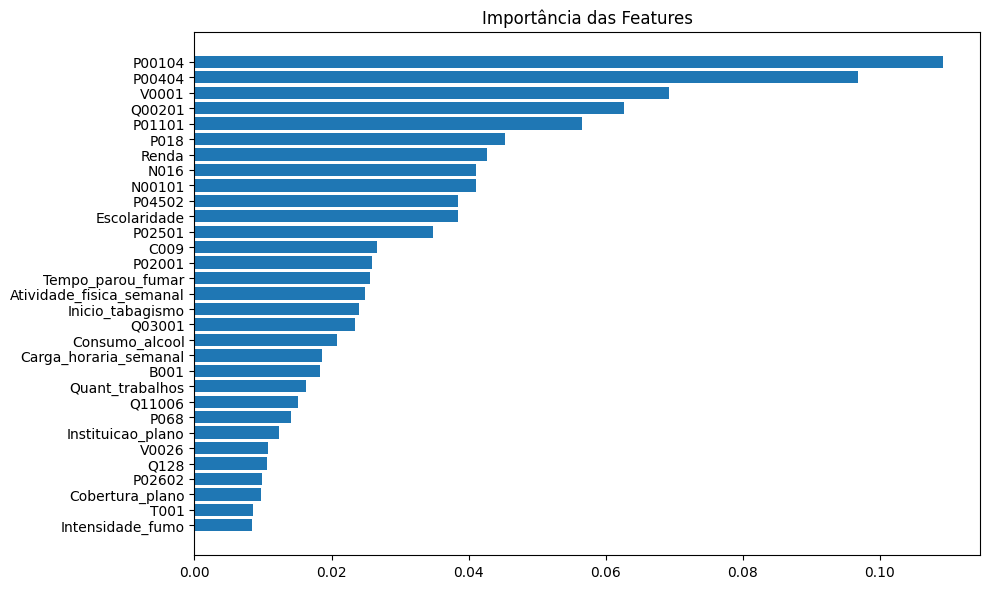

In [28]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### Random UnderSampling

In [29]:
bayes_search.fit(X_treino_rd_under, y_treino_rd_under)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'entropy', 'max_depth': 18, 'max_features': 4, 'min_samples_leaf': 9, 'min_samples_split': 20, 'n_estimators': 80})
Melhor pontuação de validação cruzada: 0.69


In [30]:
best_model_bayes = bayes_search.best_estimator_

In [31]:
previsoes_bayes = best_model_bayes.predict(X_teste_rd_under)

In [32]:
print(classification_report(y_teste_rd_under, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.11      0.71      0.19       359
         2.0       0.97      0.64      0.77      5789

    accuracy                           0.64      6148
   macro avg       0.54      0.67      0.48      6148
weighted avg       0.92      0.64      0.74      6148



Variáveis mais relevantes:
Q00201: 0.173331470277643
P00104: 0.07475506050797348
N016: 0.06951650759668351
P00404: 0.06798308972237818
N00101: 0.053004400242644835
V0001: 0.050579634625876745
P018: 0.03987152982038704
P01101: 0.03803798192495378
Q03001: 0.03613417253081226
P04502: 0.03605993636179196
Tempo_parou_fumar: 0.03409073274404509
Escolaridade: 0.02914598453676262
Quant_trabalhos: 0.028774256079065398
Renda: 0.027428414835571215
Carga_horaria_semanal: 0.02708106825277337
Inicio_tabagismo: 0.025983284305806105
P02501: 0.024669145796004176
P02001: 0.022798266479760028
V0026: 0.01919185427473991
Atividade_fisica_semanal: 0.018674784699178295
C009: 0.01759247918383341
Consumo_alcool: 0.016226649995147634
B001: 0.01220621819381055
Instituicao_plano: 0.009992931990706687
Cobertura_plano: 0.009302337994725523
Q11006: 0.009184075132144054
P068: 0.00898846461245827
Q128: 0.00792129969192271
Intensidade_fumo: 0.006114045397007117
P02602: 0.0032667124877237145
T001: 0.002093209705669344


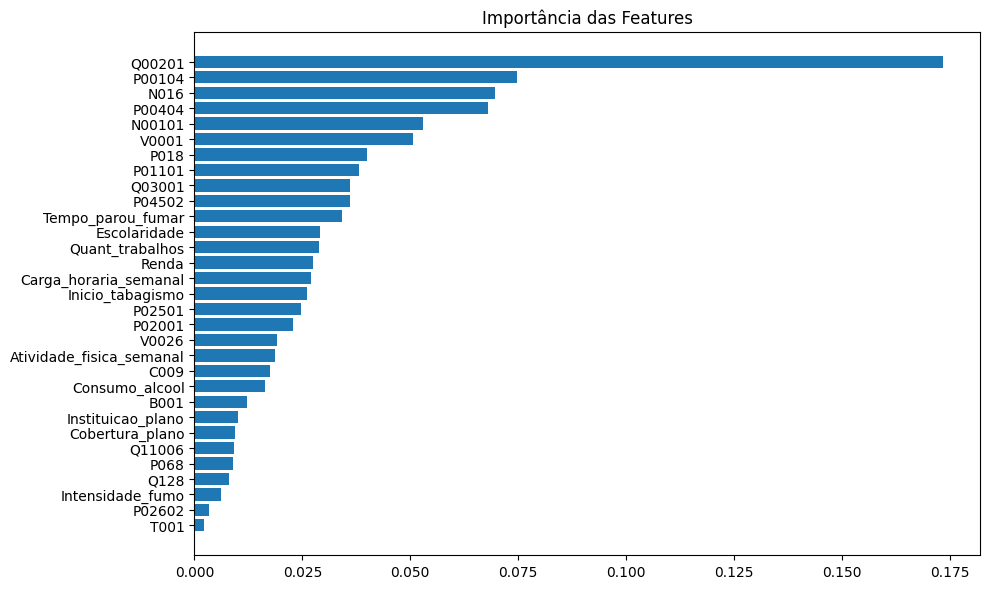

In [33]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

### DSTO

In [34]:
bayes_search.fit(X_treino_DSTO, y_treino_DSTO)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 37, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 79})
Melhor pontuação de validação cruzada: 0.97


In [35]:
best_model_bayes = bayes_search.best_estimator_

In [36]:
previsoes_bayes = best_model_bayes.predict(X_teste_DSTO)

In [37]:
print(classification_report(y_teste_DSTO, previsoes_bayes))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       359
         2.0       0.94      1.00      0.97      5789

    accuracy                           0.94      6148
   macro avg       0.47      0.50      0.48      6148
weighted avg       0.89      0.94      0.91      6148



c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\llays\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Variáveis mais relevantes:
T001: 0.18050782304781338
Inicio_tabagismo: 0.1755183266718979
Cobertura_plano: 0.09663190090641487
Q128: 0.09152408749121224
Instituicao_plano: 0.07786137669731824
Escolaridade: 0.07303767959682037
Q03001: 0.06987099132803312
P02602: 0.05418243815832055
Renda: 0.03339314391876346
N016: 0.027150063972758286
V0026: 0.02138851111281679
Atividade_fisica_semanal: 0.017696442931325725
P02001: 0.016624133323073824
Carga_horaria_semanal: 0.010467369318538648
Intensidade_fumo: 0.008286812883385801
Q11006: 0.007773258364545853
N00101: 0.005522738993079875
Q00201: 0.00473366901811611
P00104: 0.004259024817000194
P00404: 0.0036997280170041618
Consumo_alcool: 0.002883439415920502
V0001: 0.0025740161297694714
P01101: 0.0023007494666007454
C009: 0.0022696584923296063
P02501: 0.0021428758424633814
P018: 0.0018402485511638663
P04502: 0.0014438701738640838
B001: 0.001421914979728992
P068: 0.0012861803232538823
Tempo_parou_fumar: 0.0010638453396400569
Quant_trabalhos: 0.000643

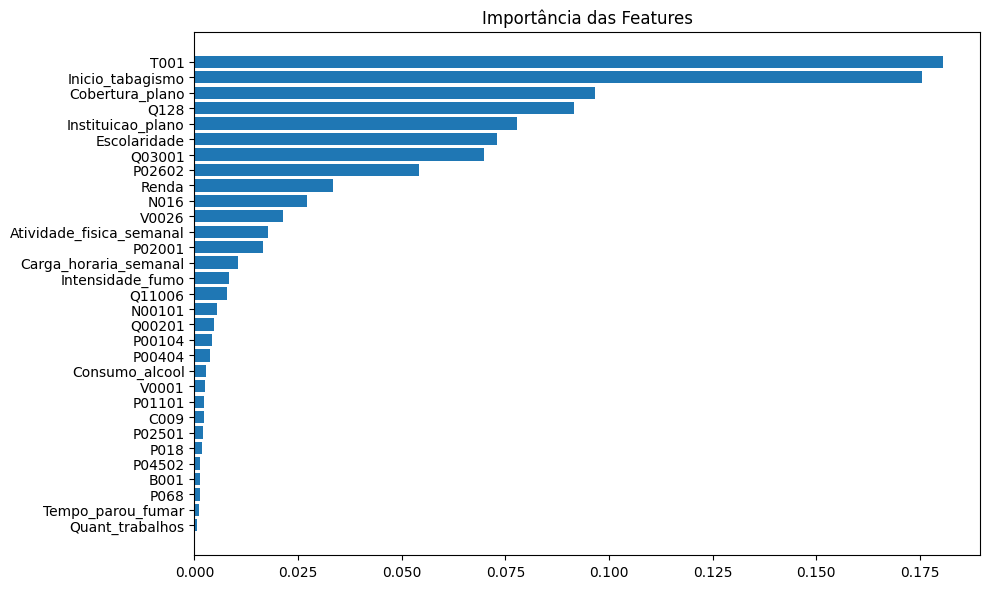

In [38]:
# Obter a importância das features
importancias = best_model_bayes.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = feature_names

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
nomes_array = np.array(nomes_das_features)
plt.yticks(range(X_treino.shape[1]), nomes_array[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()